In [2]:
# Import modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Figures inline and set visualization style
%matplotlib inline
sns.set()

# Import data
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
survived_train = df_train['Survived']
data = pd.concat([df_train.drop('Survived', axis =1),df_test])#axis = 1 means you want to drop a column, not a row
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


In [5]:
data['Age'] = data.Age.fillna(data.Age.median())      #Lets first focus on fixing the numerical null values.
data['Fare'] = data.Fare.fillna(data.Fare.median())   #We can fix it by either mean, median or mode

In [6]:
data = pd.get_dummies(data, columns=['Sex'], drop_first = True) #if you have a bunch of features that you want to use to predict because you noticed from your exploratory data analysis that they'll be important 
data.head() #But you want to encode your data with numbers, You do this because most machine learning models work input features that are numerical
#drop_first : If True, it drops the first level of each categorical variable, which can help avoid multicollinearity in some models.

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_male
0,1,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,0
4,5,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,1


In [7]:
data = data[['Sex_male', 'Fare', 'Age','Pclass', 'SibSp']]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sex_male  1309 non-null   uint8  
 1   Fare      1309 non-null   float64
 2   Age       1309 non-null   float64
 3   Pclass    1309 non-null   int64  
 4   SibSp     1309 non-null   int64  
dtypes: float64(2), int64(2), uint8(1)
memory usage: 52.4 KB


In [8]:
data_train = data.iloc[:891] #iloc locate the rows and here we slice the data into two parts after manipulation
data_test = data.iloc[891:] #iloc function is used to slice the data frame by integer location.

In [9]:
X = data_train.values #we will use scikit-learn, which requires your data as arrays, not DataFrames
test = data_test.values #The .values attribute of a pandas dataframe returns a numpy array representation of the dataframe.
y = survived_train.values

In [10]:
clf = tree.DecisionTreeClassifier(max_depth=3) #create an instance of the DecisionTreeClassifier class from scikit-learn's tree module.
clf.fit(X, y) #The DecisionTreeClassifier is a machine learning model based on decision tree algorithms.
#The max_depth parameter is set to 3, which limits the maximum depth of the tree. This is a hyperparameter that controls the maximum depth of the decision tree, and it can help prevent overfitting

DecisionTreeClassifier(max_depth=3)

In [11]:
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, random_state=None,
            splitter='best')


DecisionTreeClassifier(max_depth=3)

In [12]:
Y_pred = clf.predict(test)
df_test['Survived'] = Y_pred

In [13]:
import os
os.makedirs('data/predictions/', exist_ok=True)
df_test[['PassengerId', 'Survived']].to_csv('data/predictions/1st_dec_tree.csv', index=False)

[Text(167.4, 190.26, 'X[0] <= 0.5\ngini = 0.473\nsamples = 891\nvalue = [549, 342]'),
 Text(83.7, 135.9, 'X[3] <= 2.5\ngini = 0.383\nsamples = 314\nvalue = [81, 233]'),
 Text(41.85, 81.53999999999999, 'X[2] <= 2.5\ngini = 0.1\nsamples = 170\nvalue = [9, 161]'),
 Text(20.925, 27.180000000000007, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(62.775000000000006, 27.180000000000007, 'gini = 0.091\nsamples = 168\nvalue = [8, 160]'),
 Text(125.55000000000001, 81.53999999999999, 'X[1] <= 23.35\ngini = 0.5\nsamples = 144\nvalue = [72, 72]'),
 Text(104.625, 27.180000000000007, 'gini = 0.484\nsamples = 117\nvalue = [48, 69]'),
 Text(146.475, 27.180000000000007, 'gini = 0.198\nsamples = 27\nvalue = [24, 3]'),
 Text(251.10000000000002, 135.9, 'X[2] <= 6.5\ngini = 0.306\nsamples = 577\nvalue = [468, 109]'),
 Text(209.25, 81.53999999999999, 'X[4] <= 2.5\ngini = 0.444\nsamples = 24\nvalue = [8, 16]'),
 Text(188.32500000000002, 27.180000000000007, 'gini = 0.0\nsamples = 15\nvalue = [0, 15]'),
 Tex

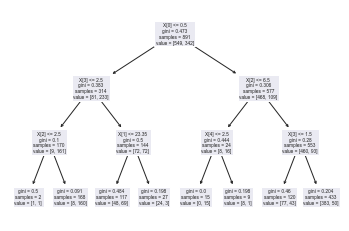

In [14]:
tree.plot_tree(clf)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42, stratify=y)


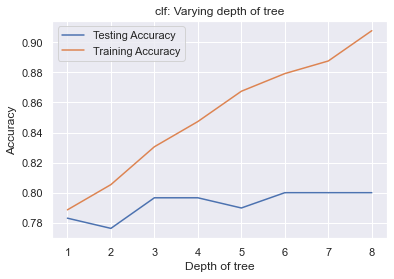

In [16]:
# Setup arrays to store train and test accuracies
dep = np.arange(1, 9)
train_accuracy = np.empty(len(dep))
test_accuracy = np.empty(len(dep))

# Loop over different values of k
for i, k in enumerate(dep):
    # Setup a Decision Tree Classifier
    clf = tree.DecisionTreeClassifier(max_depth=k)

    # Fit the classifier to the training data
    clf.fit(X_train, y_train)

    #Compute accuracy on the training set
    train_accuracy[i] = clf.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = clf.score(X_test, y_test)

# Generate plot
plt.title('clf: Varying depth of tree')
plt.plot(dep, test_accuracy, label = 'Testing Accuracy')
plt.plot(dep, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Depth of tree')
plt.ylabel('Accuracy')
plt.show()
